<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/neural_networks/diabetes/task3/diabetes_Seq_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy 
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'https://raw.githubusercontent.com/carvalheirafc/deep_learning_stuff/master/neural_networks/diabetes/diabetes_pca_result.csv'
df = pd.read_csv(file_path)
features = df.drop('Diagnóstico', axis = 1)
target = df['Diagnóstico']


print('Data Shape:', features.shape)
print('Labels/Target:', target.shape)
df.describe().transpose()

Data Shape: (768, 4)
Labels/Target: (768,)


,count,mean,std,min,25%,50%,75%,max
Component 1,768.0,-6.693141e-17,1.711960,-5.587340,-1.027072,0.152931,1.095689,5.963579
Component 2,768.0,-6.071532e-17,1.318184,-2.955806,-1.007096,-0.225966,0.959128,3.606582
Component 3,768.0,-3.324887e-17,1.015629,-3.203088,-0.646496,-0.103940,0.549774,4.754503
Component 4,768.0,2.349105e-18,0.966941,-2.192185,-0.664677,-0.115829,0.543242,4.125987
Diagnóstico,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [0]:
def get_train_test(X, y, n_splts=10):
  k_fold = StratifiedKFold(n_splits=n_splts, shuffle=True)

  X_train = []
  X_test = []
  y_train = []
  y_test = []
  
  for train_indices, test_indices in k_fold.split(X, y):
    X_train.append( X[train_indices] )
    y_train.append( y[train_indices] )
    X_test.append( X[test_indices] )
    y_test.append( y[test_indices] )
      

  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test) 

In [0]:
x = tf.placeholder(dtype=tf.float32, shape=(None, 1))
y_true = tf.placeholder(dtype=tf.float32, shape=(None, 1))

In [0]:
def model():
  network = tf.keras.Sequential()

    
  network.add(tf.layers.Dense(units=32, activation='relu', input_shape=(features.shape[1],),
                              kernel_initializer='random_uniform', bias_initializer='ones'))

    
  network.add(tf.layers.Dense(units=32, activation='relu'))
  
  network.add(tf.layers.Dense(units=1, activation='sigmoid'))
  return network

In [0]:
def train_predict(optimizer, seed, X, y):
  with tf.device('/gpu:0'):
    # Metrics
    cvscores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
  
    
    network = model()
    k_fold = StratifiedKFold(n_splits=25, shuffle=True, random_state=seed)
    
    network.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
    X_train = []
    for train, test in k_fold.split(X, y):
      X_train.append(X[train])
      history = network.fit(X[train], y[train], validation_split=0.5, epochs=200, batch_size=128, verbose=0)
      
      scores = network.evaluate(X[test], y[test], verbose=0)
      y_pred = network.predict_classes(X[test])
      
      cvscores.append(scores[1] * 100)
      accuracy_scores.append(accuracy_score(y[test], y_pred))
      precision_scores.append(precision_score(y[test], y_pred))
      recall_scores.append(recall_score(y[test], y_pred))
      f1_scores.append(f1_score(y[test], y_pred))
      print(network.metrics_names)
      print(scores)
    
    print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    print('Accuracy', numpy.round( numpy.mean(accuracy_scores) ,3) )
    print('Precision', numpy.round( numpy.mean(precision_scores) ,3) )
    print('Recall', numpy.round( numpy.mean(recall_scores), 3) )
    print('F1-measure', numpy.round( numpy.mean(f1_scores), 3) )
  return history

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

sess = tf.Session(config=config)
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def gpu(X, y, seed, optmizer):
  history = train_predict(optmizer, seed, X, y)
  
  return history

In [8]:
X = features.values
y = target.values
seed = 666
numpy.random.seed(seed)

adam_custom = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8,amsgrad=True)
history = gpu(X, y, seed, adam_custom)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
['loss', 'acc']
[0.17234323918819427, 0.7419355]
['loss', 'acc']
[0.2933128774166107, 0.58064514]
['loss', 'acc']
[0.2187981903553009, 0.67741936]
['loss', 'acc']
[0.3010379374027252, 0.6451613]
['loss', 'acc']
[0.23231755197048187, 0.67741936]
['loss', 'acc']
[0.129679337143898, 0.83870965]
['loss', 'acc']
[0.1918545663356781, 0.7741935]
['loss', 'acc']
[0.1954142302274704, 0.7096774]
['loss', 'acc']
[0.2733040452003479, 0.67741936]
['loss', 'acc']
[0.1482638716697693, 0.8064516]
['loss', 'acc']
[0.1571938693523407, 0.7741935]
['loss', 'acc']
[0.20013801753520966, 0.7741935]
['loss', 'acc']
[0.21615144610404968, 0.7096774]
['loss', 'acc']
[0.0877624899148941, 0.87096775]
['loss', 'acc']
[0.1985674649477005, 0.7741935]
['loss', 'acc']
[0.24182243645191193, 0.7096774]
['loss', 'acc']
[0.1380849927663803, 0.87096775]
['los

In [0]:
model_weights = history.model.get_weights()

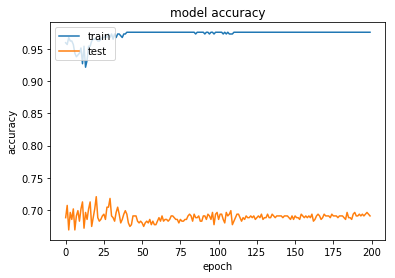

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

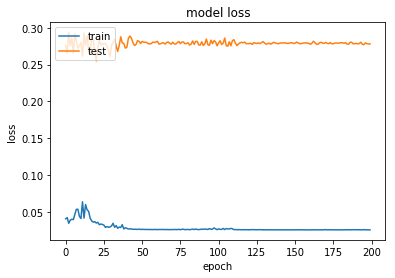

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()